# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('data/creditcard.csv')

In [3]:
# Check for NaN samples
print(f"There are {df.isna().sum().sum()} null samples.")
df = df.dropna()

There are 0 null samples.


## Exploratory data analysis

### Visualising and clarifying the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We see that the dataset has a huge number (284807) of datapoints. This can reduce the accessibility of models with are not memory efficient, e.g., KNN.

In [5]:
df["Label"] = df.Class.map({1: "Fraud", 0: "Not fraud"})

We replace the ambiguous `Class` column with a new `Label` column for clearer labeling of fraud.

In [6]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010  0.502292   

        V27       V28  Amount  Class      Label  
0  0.133558 -0.021053  149.62      0  Not fraud  
1 -0.008983  0.014724    2.69      0  Not fraud  
2 -0.055353 -0.059752  378.66      0  Not fraud  
3  0.062723  0.061458  123.50      0  Not fraud  
4  0.219422  0.215153   69.99      0  Not fraud  

[5 rows x 32 columns]

In [7]:
df.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.247012e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  8.190001e-16      0.995274   -5.791881     -0.648539   
V14     284807.0  1.207294e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  4.887456e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.437716e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -3.772171e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  9.564149e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  1.039917e-15      0.814041   -7.213527     -0.456299   
V20     284807.0  6.406204e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.654067e-16      0.734524  -34.830382     -0.228395   
V22     284807.0 -3.568593e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  2.578648e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.473266e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  5.340915e-16      0.521278  -10.295397     -0.317145   
V26     284807.0  1.683437e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660091e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.227390e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

### Balance in the dataset

In [8]:
num_fraud = df[df.Label == "Fraud"].shape[0]
num_total = df.shape[0]

print(f"Total number of entries = {num_total}")
print(f"Total number of frauds = {num_fraud}")
print(f"Percentage of frauds = {num_fraud / num_total * 100:.5f}%")

Total number of entries = 284807
Total number of frauds = 492
Percentage of frauds = 0.17275%


This shows that the dataset is highly imbalanced, with only 0.17% of the transactions being fraudulent.

### Analysing the transaction times

Text(0.5, 1.0, 'Distribution of transaction times')

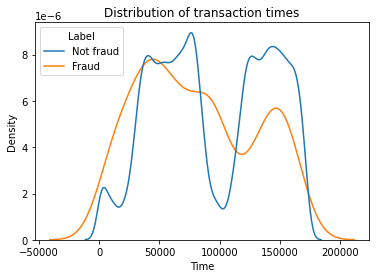

In [9]:
sns.kdeplot(data=df, x="Time", hue="Label", common_norm=False)
plt.title("Distribution of transaction times")

The `Time` column does not have any apparent pattern that we can work with, and can thus be safely dropped.

In [10]:
df = df.drop(["Time"], axis=1)

### Analysing the transaction amounts

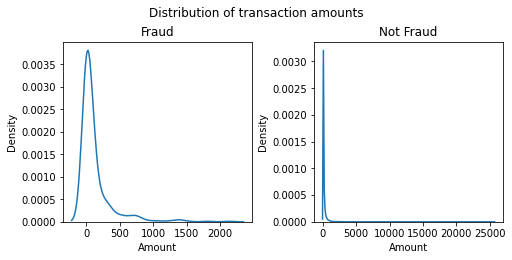

Max transaction amount = 25691.16
Max fraudulent amount = 2125.87


In [11]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3.5), constrained_layout=True)

sns.kdeplot(data=df[df.Label == "Fraud"], x="Amount", ax=axs[0])
axs[0].set_title("Fraud")

sns.kdeplot(data=df[df.Label != "Fraud"], x="Amount", ax=axs[1])
axs[1].set_title("Not Fraud")

fig.suptitle("Distribution of transaction amounts")
plt.show()

max_amount = df.Amount.max()
max_fraud = df[df.Label == "Fraud"].Amount.max()
print(f"Max transaction amount = {max_amount}")
print(f"Max fraudulent amount = {max_fraud}")

This shows that the transaction amounts are highly skewed towards the left, with most of them lying close to zero.

Further, the maximum amount among the fraudulent transactions is much less than the other transactions, with the former being around one-tenth of the latter.

### Analysing the (principal) components

Finally, we compare the distributions of fraud and non-fraud transactions for each (PCA) component, as provided in the dataset. This replaces the usual pair plot, as
1. It is time-consuming and computationally intensive to plot a $28\times28$ pair plot, and
2. Since they are specified to be the principal components, we know they are uncorrelated with each other.

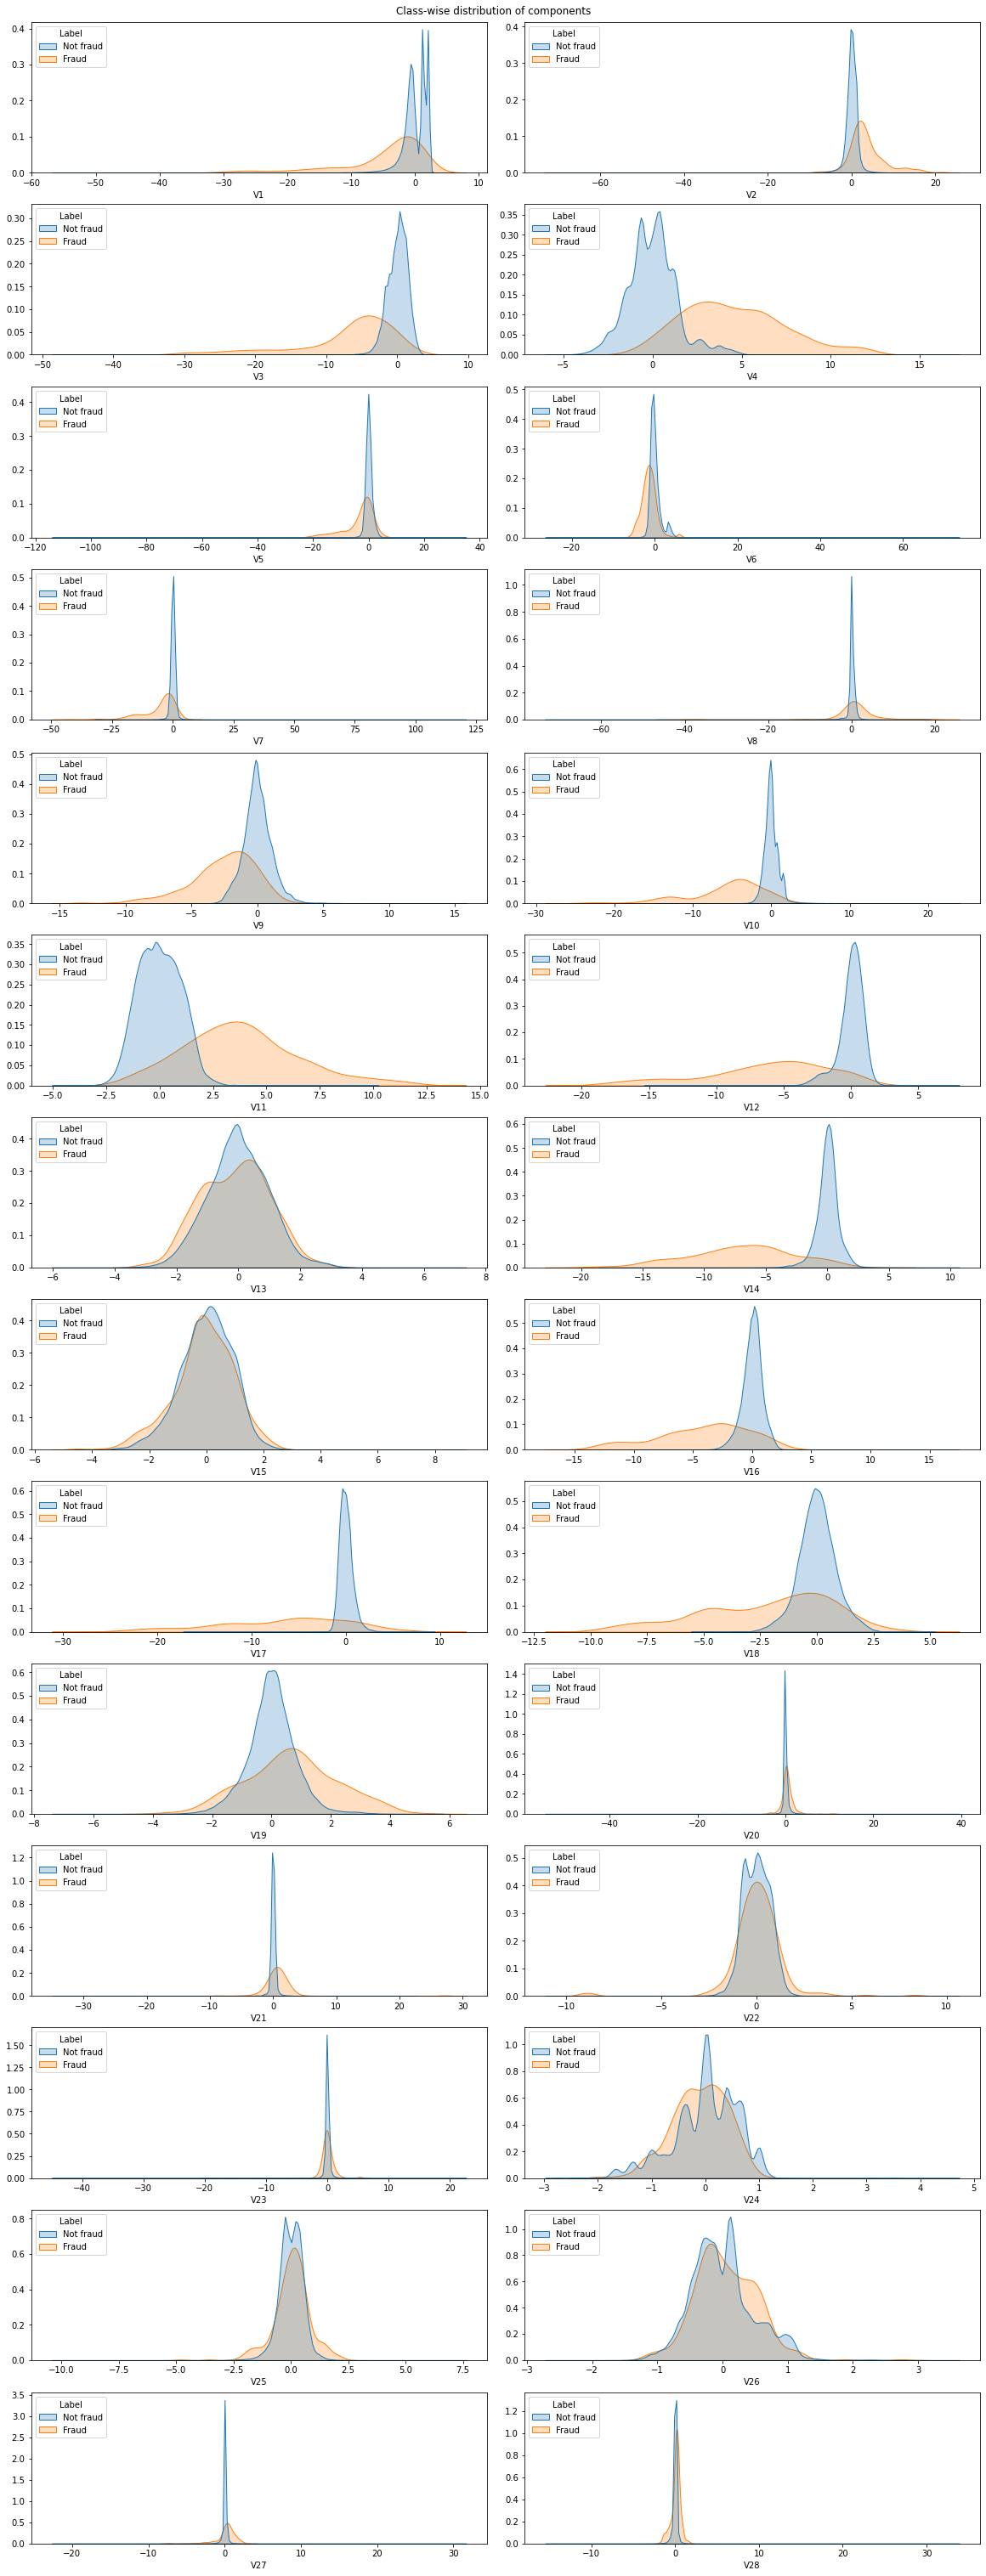

In [12]:
N = 28 # number of components V1...V28
fig, axs = plt.subplots(int(N/2), 2, figsize=(8*2, 3*N/2), constrained_layout=True)

for n in range(N):
    sns.kdeplot(data=df, x=f"V{n+1}", hue="Label",  fill=True, common_norm=False, ax=axs[int(n/2)][n%2])
    axs[int(n/2)][n%2].set_xlabel(f'V{n+1}')
    axs[int(n/2)][n%2].set_ylabel('')
    sns.move_legend(axs[int(n/2)][n%2], "upper left")

fig.suptitle("Class-wise distribution of components")
plt.show()

## Data preprocessing

### Train-test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(['Label', 'Class'], axis=1)
y = df.Class

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

We need to scale the columns to prevent unncessary bias in the model. Since PCA components are already scaled, we scale only the `Amount` column.

In [17]:
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

### Handling skewness

Many ML models work better with normally distributed features, as skewness in data can give biased results. We use `PowerTransformer` to reduce skewness.

In [18]:
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

In [19]:
X_cols = X_train.columns

X_train[X_cols] = PT.fit_transform(X_train)
X_test[X_cols] = PT.transform(X_test)

## Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

# metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# cross-validation
from sklearn.model_selection import KFold, GridSearchCV

### Hyperparameter tuning

In [21]:
kf = KFold(n_splits=5, shuffle=False)
# the KFold object above mimics the default behaviour of the GridSearchCV object; explicit declaration allows us to control shuffle and random_state, which we do not perform here.
C_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}

lr_cv = GridSearchCV(estimator=LR, param_grid=C_grid, scoring='roc_auc', cv=kf, verbose=3, return_train_score=True)
lr_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .......C=0.001;, score=(train=0.981, test=0.980) total time=   0.3s
[CV 2/5] END .......C=0.001;, score=(train=0.986, test=0.967) total time=   0.4s
[CV 3/5] END .......C=0.001;, score=(train=0.983, test=0.975) total time=   0.3s
[CV 4/5] END .......C=0.001;, score=(train=0.981, test=0.986) total time=   0.3s
[CV 5/5] END .......C=0.001;, score=(train=0.981, test=0.988) total time=   0.4s
[CV 1/5] END ........C=0.01;, score=(train=0.986, test=0.980) total time=   0.3s
[CV 2/5] END ........C=0.01;, score=(train=0.992, test=0.965) total time=   0.3s
[CV 3/5] END ........C=0.01;, score=(train=0.986, test=0.983) total time=   0.3s
[CV 4/5] END ........C=0.01;, score=(train=0.985, test=0.991) total time=   0.3s
[CV 5/5] END ........C=0.01;, score=(train=0.986, test=0.990) total time=   0.3s
[CV 1/5] END .........C=0.1;, score=(train=0.986, test=0.981) total time=   0.3s
[CV 2/5] END .........C=0.1;, score=(train=0.993,

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [22]:
lr_cv_df = pd.DataFrame(lr_cv.cv_results_)
lr_cv_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time   param_C  \
0       0.305703      0.046066         0.023016        0.004811     0.001   
1       0.274696      0.014584         0.023200        0.002492     0.010   
2       0.294621      0.020904         0.023543        0.002122     0.100   
3       0.312745      0.035729         0.023502        0.000564     1.000   
4       0.306706      0.027959         0.021193        0.002193    10.000   
5       0.312524      0.028363         0.025351        0.002390   100.000   
6       0.317607      0.034507         0.024961        0.002920  1000.000   

          params  split0_test_score  split1_test_score  split2_test_score  \
0   {'C': 0.001}           0.980139           0.966595           0.974593   
1    {'C': 0.01}           0.980313           0.964839           0.983480   
2     {'C': 0.1}           0.981063           0.960202           0.985780   
3       {'C': 1}           0.981162           0.958231           0.986029   
4    {'C': 10.0}           0.981170           0.958217           0.986046   
5   {'C': 100.0}           0.981171           0.958181           0.986051   
6  {'C': 1000.0}           0.981171           0.958177           0.986051   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.985846  ...         0.978964        0.007697                7   
1           0.991004  ...         0.981865        0.009377                1   
2           0.993072  ...         0.980962        0.011088                6   
3           0.993264  ...         0.981000        0.012020                5   
4           0.993270  ...         0.981072        0.012059                2   
5           0.993268  ...         0.981069        0.012075                3   
6           0.993268  ...         0.981069        0.012076                4   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.980965            0.985679            0.982669   
1            0.985968            0.992217            0.986212   
2            0.986424            0.992568            0.985736   
3            0.986378            0.992356            0.985579   
4            0.986370            0.992257            0.985560   
5            0.986369            0.992253            0.985558   
6            0.986369            0.992253            0.985558   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.981067            0.981177          0.982312         0.001795  
1            0.985416            0.985861          0.987135         0.002554  
2            0.985006            0.986066          0.987160         0.002744  
3            0.984212            0.986130          0.986931         0.002814  
4            0.984116            0.986159          0.986892         0.002796  
5            0.984107            0.986161          0.986890         0.002796  
6            0.984106            0.986161          0.986889         0.002796  

[7 rows x 21 columns]

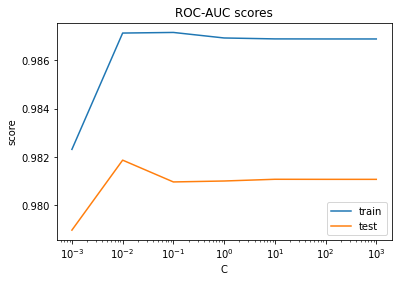

In [23]:
plt.figure()
plt.xscale('log')

sns.lineplot(data=lr_cv_df, x='param_C', y='mean_train_score', label='train')
sns.lineplot(data=lr_cv_df, x='param_C', y='mean_test_score', label='test')

plt.xlabel('C')
plt.ylabel('score')
plt.title('ROC-AUC scores')
plt.legend()
plt.show()

In [24]:
best_score = lr_cv.best_score_
best_C = lr_cv.best_params_['C']

print(f"The highest test ROC_AUC is {best_score:.8f} at C = {best_C}")

The highest test ROC_AUC is 0.98186520 at C = 0.01


### Optimal logistic regression

In [25]:
best_LR = LogisticRegression(C=best_C)
best_LR.fit(X_train, y_train)

LogisticRegression(C=0.01)

#### Predictions on train data

In [26]:
y_train_pred = best_LR.predict(X_train)

In [27]:
confusion = confusion_matrix(y_train, y_train_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_train, y_train_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_train, y_train_pred))

Accuracy =  0.9992375754900584
Precision =  0.9067796610169492
Recall = 0.622093023255814
F1-score = 0.7379310344827587


In [28]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.91      0.62      0.74       344

    accuracy                           1.00    199364
   macro avg       0.95      0.81      0.87    199364
weighted avg       1.00      1.00      1.00    199364



It is important to note that accuracy is not a very reliable metric of performance due to heavy class imbalance in the data (blindly predicting as "not fraud" would earn an accuracy of over 99%).

#### ROC-AUC on train data

In [29]:
def show_ROC(y, scores):
  fpr, tpr, thresholds = metrics.roc_curve(y, scores)
  auc_score = metrics.roc_auc_score(y, scores)

  plt.figure()
  plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.5f})")
  plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (Recall)')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

  return auc_score

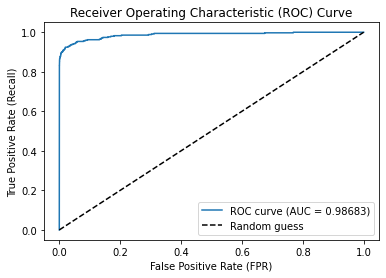

AUC-score on train data =  0.9868277232859617


In [30]:
y_train_pred_proba = best_LR.predict_proba(X_train)[:, 1]
AUC_score = show_ROC(y_train, y_train_pred_proba)
print("AUC-score on train data = ", AUC_score)

We get a very good AUC score of 0.98689 on train data.

#### Predictions on test data

In [31]:
y_test_pred = best_LR.predict(X_test)

In [32]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision = ", TP / (TP + FP))
print("Recall", TP / (TP + FN))
print("F1-score", metrics.f1_score(y_test, y_test_pred))

Accuracy =  0.9991222218320986
Precision =  0.8613861386138614
Recall 0.5878378378378378
F1-score 0.6987951807228916


In [33]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.59      0.70       148

    accuracy                           1.00     85443
   macro avg       0.93      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443



#### ROC-AUC on test data

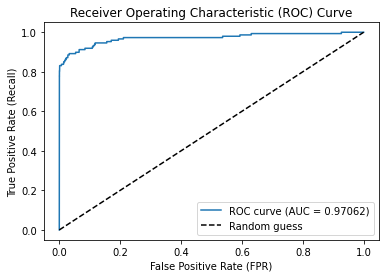

AUC-score on test data =  0.9706236543126161


In [34]:
y_test_pred_proba = best_LR.predict_proba(X_test)[:, 1]
AUC_score = show_ROC(y_test, y_test_pred_proba)
print("AUC-score on test data = ", AUC_score)

Similarly, we get a very good AUC score of 0.97062 on test data, which is close to 1.

## XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
  max_depth=2, n_estimators=250,
  scale_pos_weight = ((num_total-num_fraud) / num_fraud))
# the last parameter takes care of class imbalance

### Hyperparameter tuning

In [36]:
param_grid = {'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.6], 'subsample': [0.6, 0.7, 0.8, 0.9]}

xgb_cv = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=3, return_train_score=True)
xgb_cv.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=0.970) total time=   1.3s
[CV 2/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=0.980) total time=   1.2s
[CV 3/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=0.981) total time=   1.3s
[CV 1/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=0.974) total time=   1.1s
[CV 2/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=0.980) total time=   1.1s
[CV 3/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=0.981) total time=   1.2s
[CV 1/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=0.975) total time=   1.2s
[CV 2/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=0.978) total time=   1.2s
[CV 3/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=0.978) total time=   1.1s
[CV 1/3] END learning_rate=0.2, subsample=0.9;, 

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=250,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.6],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [37]:
xgb_cv_df = pd.DataFrame(xgb_cv.cv_results_)
xgb_cv_df.sample(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
19       1.357504      0.180154         0.071671        0.007836   
1        1.062098      0.026839         0.058203        0.002452   
2        1.090418      0.047037         0.059853        0.001544   
14       1.100503      0.051300         0.062125        0.001288   
15       1.064826      0.090567         0.062192        0.001063   

    param_learning_rate  param_subsample  \
19                  0.6              0.9   
1                   0.2              0.7   
2                   0.2              0.8   
14                  0.5              0.8   
15                  0.5              0.9   

                                      params  split0_test_score  \
19  {'learning_rate': 0.6, 'subsample': 0.9}           0.970605   
1   {'learning_rate': 0.2, 'subsample': 0.7}           0.973706   
2   {'learning_rate': 0.2, 'subsample': 0.8}           0.974507   
14  {'learning_rate': 0.5, 'subsample': 0.8}           0.973924   
15  {'learning_rate': 0.5, 'subsample': 0.9}           0.971019   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
19           0.977193           0.975263         0.974353        0.002765   
1            0.979751           0.980694         0.978050        0.003096   
2            0.977972           0.978210         0.976896        0.001693   
14           0.980915           0.977615         0.977485        0.002856   
15           0.981084           0.975544         0.975882        0.004116   

    rank_test_score  split0_train_score  split1_train_score  \
19               16            1.000000            1.000000   
1                 5            0.999958            0.999982   
2                12            0.999944            0.999982   
14                9            1.000000            1.000000   
15               14            1.000000            1.000000   

    split2_train_score  mean_train_score  std_train_score  
19            1.000000          1.000000         0.000000  
1             0.999973          0.999971         0.000010  
2             0.999976          0.999967         0.000017  
14            1.000000          1.000000         0.000000  
15            1.000000          1.000000         0.000000

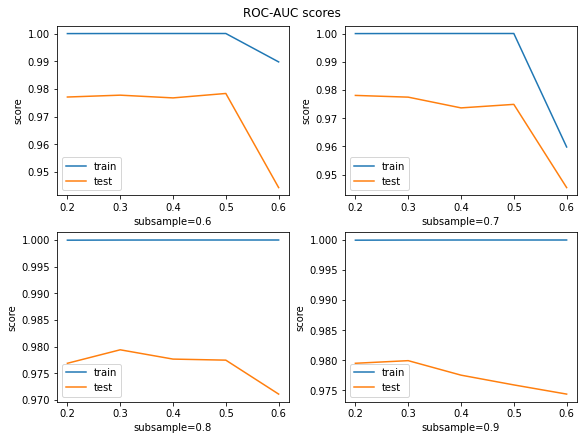

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True)

for n in range(4):
  subsample = param_grid['subsample'][n]
  temp_df = xgb_cv_df[xgb_cv_df.param_subsample == subsample]
  sns.lineplot(data=temp_df, x='param_learning_rate', y='mean_train_score', label='train', ax=axs[int(n/2)][n%2])
  sns.lineplot(data=temp_df, x='param_learning_rate', y='mean_test_score', label='test', ax=axs[int(n/2)][n%2])
  axs[int(n/2)][n%2].set_xlabel("learning rate")
  axs[int(n/2)][n%2].set_ylabel("score")
  axs[int(n/2)][n%2].set_xlabel(f"subsample={subsample}")
  axs[int(n/2)][n%2].legend()

fig.suptitle("ROC-AUC scores")
plt.show()

In [39]:
best_lr, best_ss = xgb_cv.best_params_.values()
best_xgb_score = xgb_cv.best_score_

print(f"The highest test ROC_AUC is {best_xgb_score:.8f} at subsample = {best_ss} and learning rate = {best_lr}")

The highest test ROC_AUC is 0.97991923 at subsample = 0.9 and learning rate = 0.3


### Optimal XGBoost

In [40]:
best_XGB = XGBClassifier(
  max_depth=2, n_estimators=250,
  scale_pos_weight = ((num_total-num_fraud) / num_fraud),
  subsample=best_ss, learning_rate=best_lr,
  objective='binary:logistic')
# binary:logistic: logistic regression for binary classification, output probability
best_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, ...)

#### Predictions on train data

In [41]:
y_train_pred = best_XGB.predict(X_train)

In [42]:
confusion = confusion_matrix(y_train, y_train_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_train, y_train_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_train, y_train_pred))

Accuracy =  0.9994331975682671
Precision =  0.7527352297592997
Recall = 1.0
F1-score = 0.8589263420724095


In [43]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.75      1.00      0.86       344

    accuracy                           1.00    199364
   macro avg       0.88      1.00      0.93    199364
weighted avg       1.00      1.00      1.00    199364



#### ROC-AUC on train data

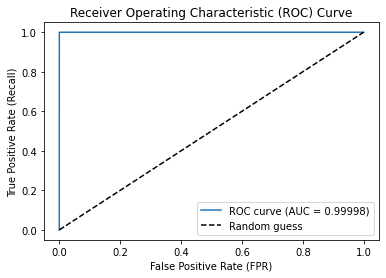

AUC-score on train data =  0.9999759577744904


In [44]:
y_train_pred_proba = best_XGB.predict_proba(X_train)[:, 1]
AUC_score = show_ROC(y_train, y_train_pred_proba)
print("AUC-score on train data = ", AUC_score)

We get a very good AUC score of 0.99997 on train data.

#### Predictions on test data

In [45]:
y_test_pred = best_XGB.predict(X_test)

In [46]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision = ", TP / (TP + FP))
print("Recall", TP / (TP + FN))
print("F1-score", metrics.f1_score(y_test, y_test_pred))

Accuracy =  0.9988179254005595
Precision =  0.6217616580310881
Recall 0.8108108108108109
F1-score 0.7038123167155426


In [47]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.62      0.81      0.70       148

    accuracy                           1.00     85443
   macro avg       0.81      0.90      0.85     85443
weighted avg       1.00      1.00      1.00     85443



#### ROC-AUC on test data

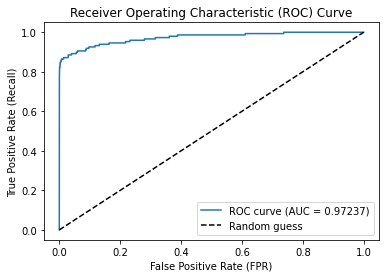

AUC-score on test data =  0.9723657005971327


In [48]:
y_test_pred_proba = best_XGB.predict_proba(X_test)[:, 1]
AUC_score = show_ROC(y_test, y_test_pred_proba)
print("AUC-score on test data = ", AUC_score)

Similarly, we get a very good AUC score of 0.97236 on test data, which is close to 1.

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

### Hyperparameter tuning

In [50]:
from time import time
start_time = time()

temp_rf = RandomForestClassifier(n_estimators=100, max_depth=25, min_samples_split=25, min_samples_leaf=25, max_features='sqrt', bootstrap=True, n_jobs=-1, class_weight='balanced')
temp_rf.fit(X_train, y_train)

end_time = time()
print(f"Time taken = {end_time - start_time} seconds.")

Time taken = 28.90929079055786 seconds.


Running one `RandomForest` model with roughly average parameter values takes ~29 seconds. This makes it difficult to perform extensive hyperparameter tuning (with grid search cross-validation) as for earlier models.

We shall use randomised search as an approximate workaround.

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [52]:
param_dist = {
    'n_estimators': randint(100, 250),
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': randint(15, 30),
    'min_samples_leaf': randint(15, 30),
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(bootstrap=True, class_weight='balanced', n_jobs=-1)
rf_cv = RandomizedSearchCV(
  estimator=rf, param_distributions=param_dist, 
  n_iter=10, scoring='roc_auc', cv=3, n_jobs=-1, 
  verbose=3, return_train_score=True)
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=27, min_samples_split=26, n_estimators=101;, score=(train=1.000, test=0.989) total time= 1.7min
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=27, min_samples_split=26, n_estimators=101;, score=(train=1.000, test=0.969) total time= 1.8min
[CV 3/3] END max_depth=10, max_features=sqrt, min_samples_leaf=27, min_samples_split=26, n_estimators=101;, score=(train=1.000, test=0.973) total time= 2.0min
[CV 2/3] END max_depth=30, max_features=sqrt, min_samples_leaf=29, min_samples_split=25, n_estimators=155;, score=(train=1.000, test=0.982) total time= 2.8min
[CV 1/3] END max_depth=30, max_features=sqrt, min_samples_leaf=29, min_samples_split=25, n_estimators=155;, score=(train=1.000, test=0.961) total time= 2.9min
[CV 3/3] END max_depth=30, max_features=sqrt, min_samples_leaf=29, min_samples_split=25, n_estimators=155;, score=(train=1.000, test=0.966) tota

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 30, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x162860f40>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16288c370>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x162862050>},
                   return_train_score=True, scoring='roc_auc', verbose=3)

In [53]:
best_params = rf_cv.best_params_
best_rf_score = rf_cv.best_score_

print(f"The highest test ROC_AUC is {best_rf_score:.8f} at params being {best_params}")

The highest test ROC_AUC is 0.97680935 at params being {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 27, 'min_samples_split': 26, 'n_estimators': 101}


### Optimal random forest

In [54]:
best_RF = RandomForestClassifier(bootstrap=True, class_weight='balanced', n_jobs=-1, **best_params)
best_RF.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=27, min_samples_split=26,
                       n_estimators=101, n_jobs=-1)

#### Predictions on train data

In [55]:
y_train_pred = best_RF.predict(X_train)

In [56]:
confusion = confusion_matrix(y_train, y_train_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_train, y_train_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_train, y_train_pred))

Accuracy =  0.9995535803856263
Precision =  0.8028503562945368
Recall = 0.9825581395348837
F1-score = 0.8836601307189542


In [57]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.80      0.98      0.88       344

    accuracy                           1.00    199364
   macro avg       0.90      0.99      0.94    199364
weighted avg       1.00      1.00      1.00    199364



#### ROC-AUC on train data

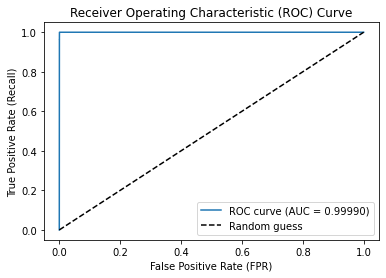

AUC-score on train data =  0.9999012165424533


In [58]:
y_train_pred_proba = best_RF.predict_proba(X_train)[:, 1]
AUC_score = show_ROC(y_train, y_train_pred_proba)
print("AUC-score on train data = ", AUC_score)

We get a very good AUC score of 0.99989 on train data.

#### Predictions on test data

In [59]:
y_test_pred = best_RF.predict(X_test)

In [60]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision = ", TP / (TP + FP))
print("Recall", TP / (TP + FN))
print("F1-score", metrics.f1_score(y_test, y_test_pred))

Accuracy =  0.9990988144142879
Precision =  0.7125748502994012
Recall 0.8040540540540541
F1-score 0.7555555555555555


In [61]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.71      0.80      0.76       148

    accuracy                           1.00     85443
   macro avg       0.86      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443



#### ROC-AUC on test data

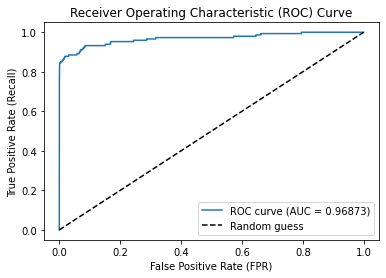

AUC-score on test data =  0.9687301464076188


In [62]:
y_test_pred_proba = best_RF.predict_proba(X_test)[:, 1]
AUC_score = show_ROC(y_test, y_test_pred_proba)
print("AUC-score on test data = ", AUC_score)

Similarly, we get a very good AUC score of 0.96873 on test data, which is close to 1.

## Best model from preliminary analysis

Thus, we see that XGBoost is the best model (with AUC score of 0.97236) among the three tested above, with the baseline logistic regression model following a close second.

It is important to note that this is somewhat biased and highly subject to hyperparameter tuning and the grid considered for search. This bias is further presented in the Random Forest, where we perform a randomised search over a large grid.

We proceed with XGBoost and logistic regression models for further analysis, as they generally take lesser time and resources than Random Forest, as seen above.